# Week 3 Assignment
## Section 1

In [2]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

In [3]:
import requests

In [4]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
html_data = requests.get(url)
soup = BeautifulSoup(html_data.text, "html.parser")

In [10]:
table = soup.find('table')
df = pd.DataFrame(columns=['PostalCode', 'Borough', 'Neighborhood'])

In [17]:
for row in table.find_all('td'):
    if row.span.text == 'Not assigned':
        pass
    else:
        postal = row.p.text[:3]
        borough = (row.span.text).split('(')[0]
        neigh = (((row.span.text).split('(')[1]).replace(" /", ",").replace(")", ""))
        
        df = df.append({"PostalCode":postal, "Borough": borough, "Neighborhood":neigh}, ignore_index=True)
df

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East TorontoBusiness reply mail Processing Cen...,Enclave of M4L
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [23]:
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

In [24]:
df

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto Business,Enclave of M4L
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [25]:
df.shape

(103, 3)

## Section 2

In [31]:
df_geo = pd.read_csv("Geospatial_Coordinates.csv")
df_geo = df_geo.rename(columns={"Postal Code": "PostalCode"})
df_geo.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [32]:
df2 = pd.merge(df, df_geo, on=['PostalCode'])

In [33]:
df2

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto Business,Enclave of M4L,43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


## Section 3

In [37]:
import folium
from sklearn.cluster import KMeans

#### Define Foursquare Credentials and Version

In [38]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ZTPIBRCJURL5HU4PBNY1LUWHMHGEE5HQFOGAT4IJIUIBDZKT
CLIENT_SECRET:3H2VWAS1INJDVFRSSUKIQ20W24XYVQPTVQJLI3U0YDTT4VUE


In [52]:
toronto_df = df2[df2['Borough'].str.contains('Toronto')]
toronto_df.reset_index(drop=True, inplace=True)

Visualize Toronto


In [53]:
latitude = 43.654260
longitude = -79.3800
toronto_map = folium.Map(location=[latitude, longitude], zoom_start = 11)

for lat, lng, label in zip(toronto_df["Latitude"], toronto_df["Longitude"], toronto_df["Neighborhood"]):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],
                        radius=5,
                        popup=label,
                        color='blue',
                        fill=True,
                        fill_color='#3186cc',
                        fill_opacity=0.7,
                        parse_html=False).add_to(toronto_map)
toronto_map

#### Explore the first neighborhood in the dataframe

In [58]:
toronto_df.loc[0, :]

PostalCode                            M5A
Borough                  Downtown Toronto
Neighborhood    Regent Park, Harbourfront
Latitude                          43.6543
Longitude                        -79.3606
Name: 0, dtype: object

#### Get top 20 venues within 500 meters

In [98]:
LIMIT = 50
RADIUS = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    toronto_df.loc[0, 'Latitude'], 
    toronto_df.loc[0, 'Longitude'], 
    RADIUS, 
    LIMIT)
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60ab52d77de6762c4f301ada'},
 'response': {'headerLocation': 'Corktown',
  'headerFullLocation': 'Corktown, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 44,
  'suggestedBounds': {'ne': {'lat': 43.6587599045, 'lng': -79.3544279001486},
   'sw': {'lat': 43.6497598955, 'lng': -79.36684389985142}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '54ea41ad498e9a11e9e13308',
       'name': 'Roselle Desserts',
       'location': {'address': '362 King St E',
        'crossStreet': 'Trinity St',
        'lat': 43.653446723052674,
        'lng': -79.3620167174383,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.653446723052674,
          'lng': -79.3620167174383}],
        'distance': 143,
       

In [99]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [100]:
from pandas.io.json import json_normalize
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

C:\Users\namhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


,name,categories,lat,lng
0,Roselle Desserts,Bakery,43.653447,-79.362017
1,Tandem Coffee,Coffee Shop,43.653559,-79.361809
2,Cooper Koo Family YMCA,Distribution Center,43.653249,-79.358008
3,Impact Kitchen,Restaurant,43.656369,-79.356980
4,Body Blitz Spa East,Spa,43.654735,-79.359874


In [101]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

44 venues were returned by Foursquare.


#### Repeat the same process to all the neighborhoods in Toronto

In [102]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        results = requests.get(url).json()["response"]["groups"][0]["items"]
        venues_list.append([(name, 
                            lat, 
                            lng, 
                            v['venue']['name'],
                            v['venue']['location']['lat'],
                            v['venue']['location']['lng'],
                            v['venue']['categories'][0]['name']) for v in results])
        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues) 

In [103]:
toronto_venues = getNearbyVenues(names=toronto_df['Neighborhood'],
                                 latitudes=toronto_df['Latitude'],
                                 longitudes=toronto_df['Longitude'])

In [104]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
4,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa


In [105]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,50,50,50,50,50,50
"Brockton, Parkdale Village, Exhibition Place",23,23,23,23,23,23
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",13,13,13,13,13,13
Central Bay Street,50,50,50,50,50,50
Christie,16,16,16,16,16,16
Church and Wellesley,50,50,50,50,50,50
"Commerce Court, Victoria Hotel",50,50,50,50,50,50
Davisville,35,35,35,35,35,35
Davisville North,7,7,7,7,7,7


#### Analyze each neighborhood

In [106]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix='', prefix_sep='')

toronto_onehot.insert(0,'NeighborhoodArea', toronto_venues['Neighborhood'])
# fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
# toronto_onehot = toronto_onehot[fixed_columns]
toronto_onehot.head()

,NeighborhoodArea,Adult Boutique,Airport,Airport Food Court,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Aquarium,Art Gallery,...,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
toronto_grouped = toronto_onehot.groupby('NeighborhoodArea').mean().reset_index()

In [108]:
toronto_grouped.shape

(39, 215)

In [109]:
num_top_venues = 5

for hood in toronto_grouped['NeighborhoodArea']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['NeighborhoodArea'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
          venue  freq
0  Cocktail Bar  0.06
1   Coffee Shop  0.06
2        Bakery  0.06
3    Restaurant  0.04
4      Pharmacy  0.04


----Brockton, Parkdale Village, Exhibition Place----
            venue  freq
0            Café  0.13
1          Bakery  0.09
2     Coffee Shop  0.09
3  Breakfast Spot  0.09
4    Intersection  0.04


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
                 venue  freq
0      Airport Service  0.23
1       Airport Lounge  0.15
2             Boutique  0.08
3  Rental Car Location  0.08
4   Airport Food Court  0.08


----Central Bay Street----
             venue  freq
0      Coffee Shop  0.18
1             Café  0.06
2   Sandwich Place  0.06
3  Bubble Tea Shop  0.04
4     Burger Joint  0.04


----Christie----
           venue  freq
0  Grocery Store  0.25
1           Café  0.19
2           Park  0.12
3     Restaurant  0.06
4    Candy Store  0.06


----Church and Welle

#### Put top 5 venues into dataframe

In [110]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [126]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['NeighborhoodArea']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Cocktail Bar,Bakery,Coffee Shop,Beer Bar,Farmers Market,Pharmacy,Seafood Restaurant,Restaurant,Cheese Shop,Japanese Restaurant
1,"Brockton, Parkdale Village, Exhibition Place",Café,Breakfast Spot,Coffee Shop,Bakery,Performing Arts Venue,Furniture / Home Store,Pet Store,Grocery Store,Gym,Restaurant
2,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Boat or Ferry,Airport,Airport Food Court,Boutique,Sculpture Garden,Rental Car Location,Plane,Harbor / Marina
3,Central Bay Street,Coffee Shop,Café,Sandwich Place,Bubble Tea Shop,Burger Joint,Italian Restaurant,Yoga Studio,Middle Eastern Restaurant,Portuguese Restaurant,Poke Place
4,Christie,Grocery Store,Café,Park,Candy Store,Restaurant,Baby Store,Coffee Shop,Nightclub,Italian Restaurant,Athletics & Sports


#### Cluster Neighborhoods

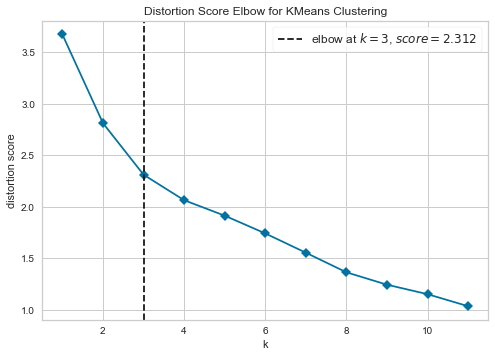

In [122]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
X = toronto_grouped.drop('NeighborhoodArea', axis=1)
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,12),timings=False)
visualizer.fit(X)
visualizer.show();

In [124]:
kclusters = 3
toronto_grouped_clustering = toronto_grouped.drop('NeighborhoodArea', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=42).fit(toronto_grouped_clustering)
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [127]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_df

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,Coffee Shop,Bakery,Park,Breakfast Spot,Café,Pub,Theater,Mexican Restaurant,Shoe Store,Restaurant
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,Coffee Shop,Clothing Store,Middle Eastern Restaurant,Café,Theater,Ramen Restaurant,Cosmetics Shop,Sandwich Place,Diner,Bookstore
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Café,Coffee Shop,Gastropub,Farmers Market,Creperie,Park,Cheese Shop,Seafood Restaurant,Cosmetics Shop,Bookstore
3,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Health Food Store,Coffee Shop,Neighborhood,Trail,Pub,Yoga Studio,Dessert Shop,Diner,Discount Store,Dog Run
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0,Cocktail Bar,Bakery,Coffee Shop,Beer Bar,Farmers Market,Pharmacy,Seafood Restaurant,Restaurant,Cheese Shop,Japanese Restaurant


In [128]:
from matplotlib import cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [129]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,0,Coffee Shop,Bakery,Park,Breakfast Spot,Café,Pub,Theater,Mexican Restaurant,Shoe Store,Restaurant
1,Downtown Toronto,0,Coffee Shop,Clothing Store,Middle Eastern Restaurant,Café,Theater,Ramen Restaurant,Cosmetics Shop,Sandwich Place,Diner,Bookstore
2,Downtown Toronto,0,Café,Coffee Shop,Gastropub,Farmers Market,Creperie,Park,Cheese Shop,Seafood Restaurant,Cosmetics Shop,Bookstore
3,East Toronto,0,Health Food Store,Coffee Shop,Neighborhood,Trail,Pub,Yoga Studio,Dessert Shop,Diner,Discount Store,Dog Run
4,Downtown Toronto,0,Cocktail Bar,Bakery,Coffee Shop,Beer Bar,Farmers Market,Pharmacy,Seafood Restaurant,Restaurant,Cheese Shop,Japanese Restaurant
5,Downtown Toronto,0,Coffee Shop,Café,Sandwich Place,Bubble Tea Shop,Burger Joint,Italian Restaurant,Yoga Studio,Middle Eastern Restaurant,Portuguese Restaurant,Poke Place
6,Downtown Toronto,0,Grocery Store,Café,Park,Candy Store,Restaurant,Baby Store,Coffee Shop,Nightclub,Italian Restaurant,Athletics & Sports
7,Downtown Toronto,0,Coffee Shop,Café,Seafood Restaurant,Concert Hall,Hotel,Steakhouse,American Restaurant,Sushi Restaurant,Pizza Place,Restaurant
8,West Toronto,0,Pharmacy,Bakery,Pet Store,Music Venue,Middle Eastern Restaurant,Café,Liquor Store,Brewery,Bar,Supermarket
10,Downtown Toronto,0,Coffee Shop,Aquarium,Pizza Place,Plaza,Hotel,Brewery,Park,Café,History Museum,Scenic Lookout


In [130]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,East York/East Toronto,1,Park,Convenience Store,Metro Station,Yoga Studio,Dessert Shop,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant
18,Central Toronto,1,Park,Swim School,Bus Line,Yoga Studio,Dessert Shop,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant
21,Central Toronto,1,Park,Jewelry Store,Trail,Sushi Restaurant,Yoga Studio,Dessert Shop,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop
29,Central Toronto,1,Park,Restaurant,Yoga Studio,Department Store,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run
33,Downtown Toronto,1,Park,Playground,Trail,Yoga Studio,Deli / Bodega,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run


In [131]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Central Toronto,2,Garden,Home Service,Yoga Studio,Department Store,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run
